# 🎯 04 - Customer Segmentation (Clustering)
## E-commerce Customer Behavior Analysis

**Tujuan Notebook:**
- K-Means clustering
- Elbow Method untuk optimal K
- Segment profiling
- Visualisasi cluster
- Insight karakter tiap segmen

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import sys
import os

sys.path.insert(0, os.path.abspath('../src'))
from models import find_optimal_k, train_kmeans, get_cluster_summary, save_model
from ai_logic import interpret_cluster, generate_cluster_profiles, generate_segment_strategy

plt.style.use('seaborn-v0_8-whitegrid')
os.makedirs('../outputs/models', exist_ok=True)

print('✅ Libraries imported successfully!')

✅ Libraries imported successfully!


---
## 1. Load & Prepare Data

In [2]:
# Load processed data
df = pd.read_csv('../data/processed/customer_features.csv')
print(f"✅ Data loaded: {df.shape[0]} rows, {df.shape[1]} columns")

✅ Data loaded: 350 rows, 31 columns


In [3]:
# Select features for clustering
clustering_features = ['Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']
X = df[clustering_features].copy()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\n📊 Clustering Features:")
for feat in clustering_features:
    print(f"   • {feat}")
print(f"\n✅ Features scaled: {X_scaled.shape}")


📊 Clustering Features:
   • Total Spend
   • Items Purchased
   • Average Rating
   • Days Since Last Purchase

✅ Features scaled: (350, 4)


---
## 2. Find Optimal Number of Clusters

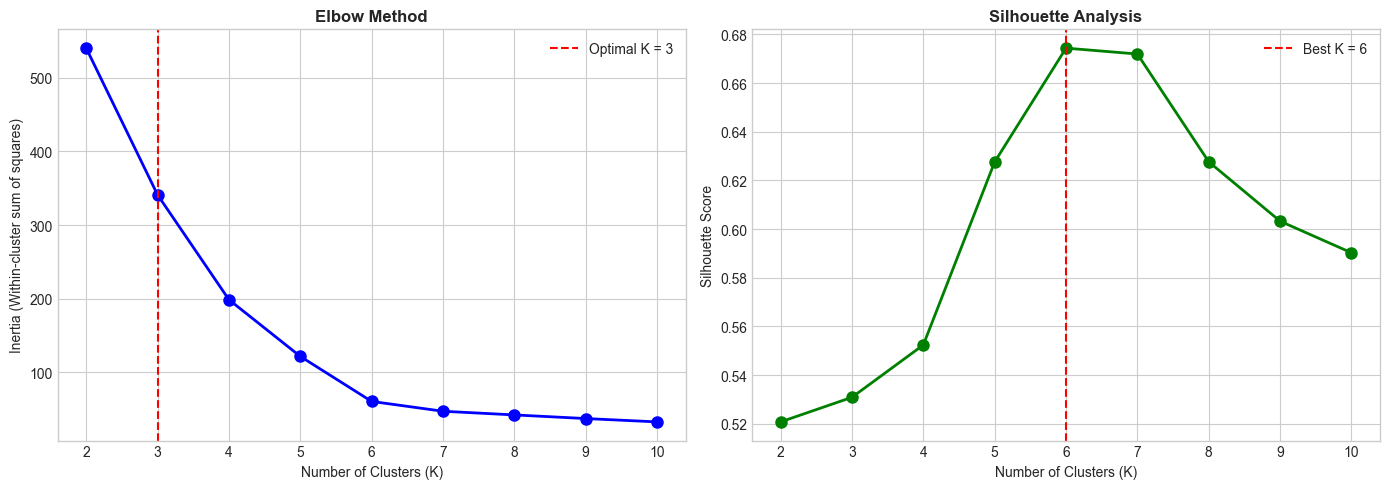


✅ Optimal K based on Silhouette Score: 6


In [4]:
# Find optimal K
k_results = find_optimal_k(X_scaled, k_range=range(2, 11))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow Method
axes[0].plot(k_results['k_values'], k_results['inertias'], 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (K)')
axes[0].set_ylabel('Inertia (Within-cluster sum of squares)')
axes[0].set_title('Elbow Method', fontweight='bold')
axes[0].axvline(x=3, color='red', linestyle='--', label='Optimal K = 3')
axes[0].legend()

# Silhouette Score
axes[1].plot(k_results['k_values'], k_results['silhouette_scores'], 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (K)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Analysis', fontweight='bold')
best_k = k_results['best_k_silhouette']
axes[1].axvline(x=best_k, color='red', linestyle='--', label=f'Best K = {best_k}')
axes[1].legend()

plt.tight_layout()
plt.savefig('../outputs/figures/13_optimal_k.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n✅ Optimal K based on Silhouette Score: {best_k}")

---
## 3. Train K-Means Model

In [5]:
# Train K-Means with optimal K
n_clusters = 3  # Based on both elbow and silhouette
kmeans, cluster_labels = train_kmeans(X_scaled, n_clusters=n_clusters)

# Add cluster labels to dataframe
df['Cluster'] = cluster_labels

print(f"\n📊 Cluster Distribution:")
cluster_counts = df['Cluster'].value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    pct = count / len(df) * 100
    print(f"   Cluster {cluster_id}: {count} customers ({pct:.1f}%)")

✅ K-Means trained: 3 clusters, Silhouette Score: 0.531

📊 Cluster Distribution:
   Cluster 0: 59 customers (16.9%)
   Cluster 1: 174 customers (49.7%)
   Cluster 2: 117 customers (33.4%)


In [6]:
# Save the model
save_model(kmeans, '../outputs/models/kmeans_model.pkl')
save_model(scaler, '../outputs/models/clustering_scaler.pkl')

✅ Model saved to: ../outputs/models/kmeans_model.pkl
✅ Model saved to: ../outputs/models/clustering_scaler.pkl


---
## 4. Cluster Profiling

In [7]:
# Get cluster summary statistics
cluster_summary = get_cluster_summary(df, cluster_labels)
print("📊 Cluster Summary Statistics:")
display(cluster_summary)

📊 Cluster Summary Statistics:


,Customer_Count,Avg_Spend,Avg_Items,Avg_Rating,Avg_Recency
Cluster,,,,,
0,59,1455.55,19.95,4.81,11.29
1,174,545.72,9.54,3.53,36.24
2,117,983.34,13.44,4.35,19.95


In [8]:
# Generate AI-powered cluster profiles
profiles = generate_cluster_profiles(cluster_summary)

print("\n" + "=" * 70)
print("🎯 AI-GENERATED CUSTOMER SEGMENT PROFILES")
print("=" * 70)

for profile in profiles:
    print(f"\n🔹 CLUSTER {profile['cluster_id']}: {profile['persona']}")
    print(f"   Customers: {profile['size']}")
    print(f"   Priority: {profile['priority']}")
    print(f"   Characteristics:")
    for char in profile['characteristics']:
        print(f"      • {char}")


🎯 AI-GENERATED CUSTOMER SEGMENT PROFILES

🔹 CLUSTER 0: VIP Champions
   Customers: 59
   Priority: High Value
   Characteristics:
      • High Spender
      • Highly Active
      • Very Satisfied

🔹 CLUSTER 1: Budget Conscious
   Customers: 174
   Priority: Retention Focus
   Characteristics:
      • Low Spender
      • Moderately Active
      • Needs Attention

🔹 CLUSTER 2: Regular Customers
   Customers: 117
   Priority: Potential Value
   Characteristics:
      • Medium Spender
      • Highly Active
      • Satisfied


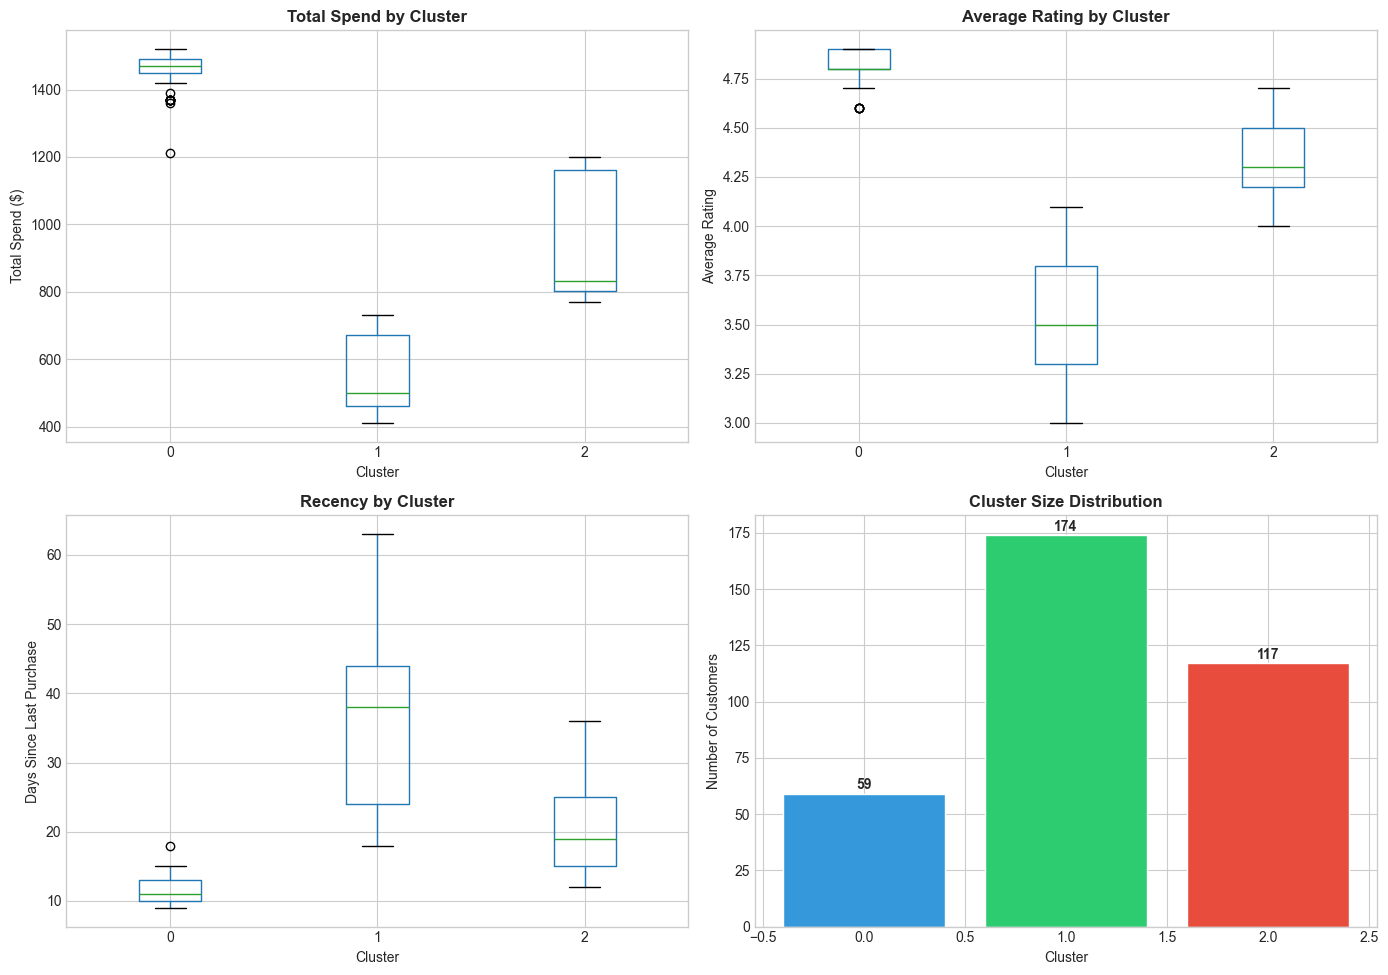

In [9]:
# Detailed profile visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

colors = ['#3498db', '#2ecc71', '#e74c3c']

# Total Spend by Cluster
df.boxplot(column='Total Spend', by='Cluster', ax=axes[0, 0])
axes[0, 0].set_title('Total Spend by Cluster', fontweight='bold')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Total Spend ($)')
plt.suptitle('')

# Average Rating by Cluster
df.boxplot(column='Average Rating', by='Cluster', ax=axes[0, 1])
axes[0, 1].set_title('Average Rating by Cluster', fontweight='bold')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Average Rating')
plt.suptitle('')

# Days Since Last Purchase by Cluster
df.boxplot(column='Days Since Last Purchase', by='Cluster', ax=axes[1, 0])
axes[1, 0].set_title('Recency by Cluster', fontweight='bold')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Days Since Last Purchase')
plt.suptitle('')

# Cluster Size
cluster_counts = df['Cluster'].value_counts().sort_index()
bars = axes[1, 1].bar(cluster_counts.index, cluster_counts.values, color=colors, edgecolor='white')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Number of Customers')
axes[1, 1].set_title('Cluster Size Distribution', fontweight='bold')
for bar in bars:
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
                    f'{int(bar.get_height())}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/figures/14_cluster_profiles.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 5. Cluster Visualization (2D)

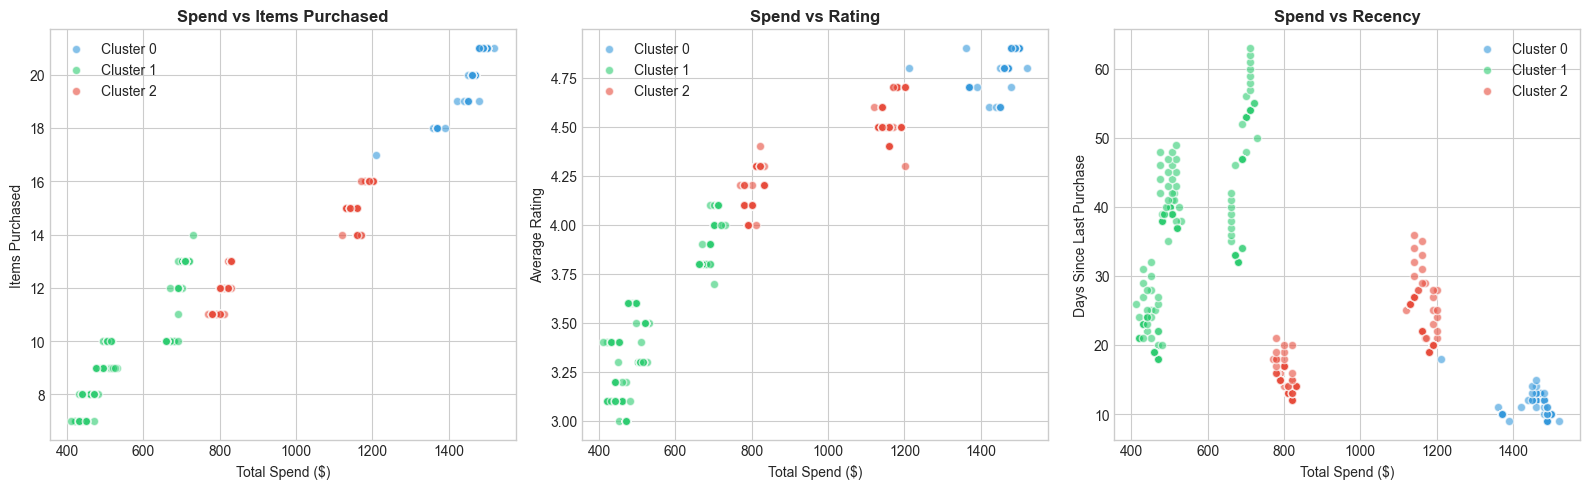

In [10]:
# 2D Scatter plots
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Spend vs Items
for cluster in range(n_clusters):
    mask = df['Cluster'] == cluster
    axes[0].scatter(df[mask]['Total Spend'], df[mask]['Items Purchased'],
                    c=colors[cluster], label=f'Cluster {cluster}', alpha=0.6, edgecolor='white')
axes[0].set_xlabel('Total Spend ($)')
axes[0].set_ylabel('Items Purchased')
axes[0].set_title('Spend vs Items Purchased', fontweight='bold')
axes[0].legend()

# Spend vs Rating
for cluster in range(n_clusters):
    mask = df['Cluster'] == cluster
    axes[1].scatter(df[mask]['Total Spend'], df[mask]['Average Rating'],
                    c=colors[cluster], label=f'Cluster {cluster}', alpha=0.6, edgecolor='white')
axes[1].set_xlabel('Total Spend ($)')
axes[1].set_ylabel('Average Rating')
axes[1].set_title('Spend vs Rating', fontweight='bold')
axes[1].legend()

# Spend vs Recency
for cluster in range(n_clusters):
    mask = df['Cluster'] == cluster
    axes[2].scatter(df[mask]['Total Spend'], df[mask]['Days Since Last Purchase'],
                    c=colors[cluster], label=f'Cluster {cluster}', alpha=0.6, edgecolor='white')
axes[2].set_xlabel('Total Spend ($)')
axes[2].set_ylabel('Days Since Last Purchase')
axes[2].set_title('Spend vs Recency', fontweight='bold')
axes[2].legend()

plt.tight_layout()
plt.savefig('../outputs/figures/15_cluster_scatter.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 6. Segment Strategy Generation

In [11]:
# Generate business strategies for each segment
strategies = generate_segment_strategy(profiles)

print("\n" + "=" * 70)
print("📋 AI-GENERATED SEGMENT STRATEGIES")
print("=" * 70)

for strategy in strategies:
    print(f"\n🎯 {strategy['segment']} (Cluster {strategy['cluster_id']})")
    print(f"   Customers: {strategy['customer_count']}")
    print(f"   \n   📢 Marketing Strategy:")
    print(f"      {strategy['marketing_strategy']}")
    print(f"   \n   🔒 Retention Strategy:")
    print(f"      {strategy['retention_strategy']}")
    print(f"   \n   💰 Upsell Opportunity:")
    print(f"      {strategy['upsell_opportunity']}")
    print(f"   \n   📊 Resource Allocation:")
    print(f"      {strategy['resource_allocation']}")
    print("   " + "-" * 60)


📋 AI-GENERATED SEGMENT STRATEGIES

🎯 VIP Champions (Cluster 0)
   Customers: 59
   
   📢 Marketing Strategy:
      Exclusive VIP experiences and early access
   
   🔒 Retention Strategy:
      Dedicated account manager, loyalty rewards
   
   💰 Upsell Opportunity:
      Premium services, bundled packages
   
   📊 Resource Allocation:
      High - Personalized attention
   ------------------------------------------------------------

🎯 Budget Conscious (Cluster 1)
   Customers: 174
   
   📢 Marketing Strategy:
      Value-focused promotions, discount alerts
   
   🔒 Retention Strategy:
      Consistent value delivery, bundle deals
   
   💰 Upsell Opportunity:
      Cross-sell affordable add-ons
   
   📊 Resource Allocation:
      Low-Medium - Efficient mass communication
   ------------------------------------------------------------

🎯 Regular Customers (Cluster 2)
   Customers: 117
   
   📢 Marketing Strategy:
      General promotions, seasonal campaigns
   
   🔒 Retention Strategy:


In [12]:
# Save clustered data
df.to_csv('../data/processed/customer_clustered.csv', index=False)
print("\n✅ Clustered data saved to: data/processed/customer_clustered.csv")


✅ Clustered data saved to: data/processed/customer_clustered.csv


---
## 7. Clustering Summary

In [13]:
print("\n" + "=" * 70)
print("📊 CLUSTERING ANALYSIS SUMMARY")
print("=" * 70)

print("\n🔹 MODEL INFORMATION:")
print(f"   • Algorithm: K-Means")
print(f"   • Number of Clusters: {n_clusters}")
print(f"   • Silhouette Score: {silhouette_score(X_scaled, cluster_labels):.3f}")

print("\n🔹 CUSTOMER SEGMENTS IDENTIFIED:")
for profile in profiles:
    print(f"   • {profile['persona']}: {profile['size']} customers ({profile['priority']} priority)")

print("\n🔹 KEY INSIGHTS:")
print("   1. Clear separation between high-value and low-value customers")
print("   2. Recency is a strong differentiator between active and at-risk segments")
print("   3. Rating patterns align with spending behavior")

print("\n" + "=" * 70)
print("✅ CLUSTERING COMPLETE!")
print("➡️ Next: 05_classification_model.ipynb")
print("=" * 70)


📊 CLUSTERING ANALYSIS SUMMARY

🔹 MODEL INFORMATION:
   • Algorithm: K-Means
   • Number of Clusters: 3
   • Silhouette Score: 0.531

🔹 CUSTOMER SEGMENTS IDENTIFIED:
   • VIP Champions: 59 customers (High Value priority)
   • Budget Conscious: 174 customers (Retention Focus priority)
   • Regular Customers: 117 customers (Potential Value priority)

🔹 KEY INSIGHTS:
   1. Clear separation between high-value and low-value customers
   2. Recency is a strong differentiator between active and at-risk segments
   3. Rating patterns align with spending behavior

✅ CLUSTERING COMPLETE!
➡️ Next: 05_classification_model.ipynb
